## This notebook is meant to be run to test machine learning models, and look at examples of predictions. This code can be run without running any other notebooks and will run quickly and efficiently without needing to scrape any data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

import os
from dotenv import load_dotenv
load_dotenv()

CLIENT_ID = os.getenv('CLIENT_ID')
CLIENT_SECRET=os.getenv('CLIENT_SECRET')
APP_NAME=os.getenv('APP_NAME')
REDDIT_USERNAME=os.getenv('REDDIT_USERNAME')
REDDIT_PASSWORD=os.getenv('REDDIT_PASSWORD')

import praw
import pandas as pd
import datetime as dt

reddit = praw.Reddit(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, user_agent=APP_NAME, username=REDDIT_USERNAME, password=REDDIT_PASSWORD)

print(reddit.user.me())

%matplotlib inline

mattcat26


In [2]:
full_comment_data = pd.read_csv('full_comment_data_with_features1111.csv')

In [3]:
full_comment_data = full_comment_data.replace({'action': {'removecomment': 0, 'approvecomment': 0, np.nan: 1}})

In [4]:
full_comment_data['action'] = full_comment_data['action'].astype('bool')

In [5]:
full_comment_data

,action,content,author,details,submissionId,commentId,WordScore,WholeScore
0,True,So what are the implications here? Does it onl...,Cody_Fox23,NaN,4op948,d4eictg,0.000000,0.849655
1,True,Sadly this isn't new. Police officers use many...,DrFrenchman,NaN,4sef35,d58ts90,0.000000,0.900283
2,True,What's disturbing about this is that our gover...,bbakks,NaN,4sef35,d58y081,-0.038865,0.869078
3,True,What I find really concerning is the horrible ...,poliscijunki,NaN,4sef35,d5919n8,0.000000,0.898426
4,True,This subject might have legs but this article ...,interweb1,NaN,64zsim,dg6l969,0.000000,0.850127
...,...,...,...,...,...,...,...,...
7226,False,Oh I thought we were posting arbitrary facts t...,38e2216dc3dc2cb196cbf4bab0d83541,remove,j0ijwn,5f70e968dbe1ef0009d976e7,0.000000,0.838691
7227,False,No. The senate is not wasting time to fill th...,c4f22a6532a4ca274c5027e4bc3d3d99,remove,j0ijwn,5f70e968dbe1ef0009d976e9,0.459704,0.840920
7228,False,"My point was not addressed, regarding providin...",062512f6041e1c40256c31f31a1138fc,unspam,j04eqv,5f70ee18dbe1ef0009d97717,1.281814,0.863294
7229,False,Voting has begun in some states but the debate...,c696933b8cbd4b625077d6b577bac0fe,remove,j0ijwn,5f70f3f4dbe1ef0009d9775e,0.000000,0.820983


In [6]:
X = full_comment_data[['WordScore', 'WholeScore']]
X = X.to_numpy()
y = full_comment_data['action']
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=20)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
neigh = KNeighborsClassifier(n_neighbors = 5)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
y_val = neigh.predict(X_test)

In [10]:
percent_arr = (y_test == y_val)
count = np.count_nonzero(percent_arr)
percentage = (count/(len(percent_arr)))*100
percentage

73.69082530372853

In [11]:
colors = {0: 'red', 1: 'green'}
markers = {0: 'x', 1: '.'}

y_train = np.array(y_train)
y_train = y_train.astype(int)
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [12]:
def plotting(x, y, truth):
    df = pd.DataFrame(x)
    df = df.rename(columns={0: 'WordScore', 1: 'WholeScore'})
    df['action'] = y
    for i in range(2):
        new_df = df[df['action'] == i]
        plt.scatter(new_df['WordScore'], new_df['WholeScore'], c=colors[i], marker=markers[i], label=i)

    plt.xlabel('WordScore')
    plt.ylabel('WholeScore')
    if truth:
        plt.title('True Testing Labels')
    else:
        plt.title('Predicted Testing Labels')

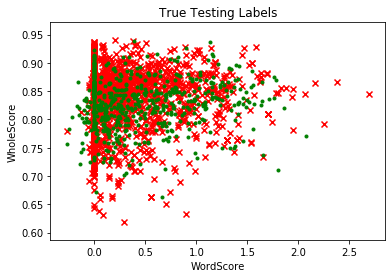

In [13]:
plotting(X_test, y_test, True)

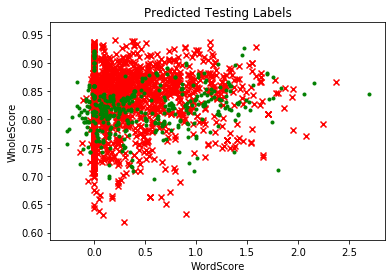

In [14]:
plotting(X_test, y_val, False)

In [15]:
full_comment_data = pd.read_csv('full_comment_data_with_features1111.csv')
full_topics_data = pd.read_csv('full_topics_data1111.csv')

In [16]:
def grabbingExamples(x, yval, ytest, number):
    predicted_comment_row = full_comment_data[full_comment_data['WholeScore'] == x[number][1]]
    predicted_comment_row = predicted_comment_row.reset_index(drop=True)
    
    if len(predicted_comment_row.index) != 1:
        predicted_comment_row = predicted_comment_row[predicted_comment_row['WordScore'] == x[number][1]]
        predicted_comment_row = predicted_comment_row.reset_index(drop=True)

    predicted_topic_row = full_topics_data[full_topics_data['id'] == predicted_comment_row['submissionId'].iloc[0]]
    predicted_comment = predicted_comment_row['content'].values[0]
    predicted_article_text = predicted_topic_row['text'].values[0]
    predicted_article_url = predicted_topic_row['url'].values[0]
    predicted_article_reason_for_removal = predicted_comment_row['details'].values[0]
    yval = yval[number]
    ytest = ytest[number]
    if yval != ytest:
        print('Incorrect Prediction')
        if yval == False:
            print('Predicted bad comment, but was good comment')
        else:
            print('Predicted good comment, but was bad comment')
    else:
        print('Correct Prediction')
        if yval == False:
            print('Correctly predicted bad comment')
        else:
            print('Correctly predicted good comment')
    print('\nThe url that was predicted on: ')
    print(predicted_article_url)
    print('\nThe comment that was predicted on: ')
    print(predicted_comment)
    print('\nThe reason that the comment was removed: ')
    print(predicted_article_reason_for_removal)
    return predicted_article_text

In [17]:
def grabbingExamplesForArray(x, yval, ytest, number):
    predicted_comment_row = full_comment_data[(full_comment_data['WholeScore'] == x[number][1]) & (full_comment_data['WordScore'] == x[number][0])]
    predicted_comment_row = predicted_comment_row.reset_index(drop=True)
    
    if len(predicted_comment_row.index) != 1:
        return

    predicted_topic_row = full_topics_data[full_topics_data['id'] == predicted_comment_row['submissionId'].iloc[0]]
    predicted_comment = predicted_comment_row['content'].values[0]
    predicted_article_text = predicted_topic_row['text'].values[0]
    predicted_article_url = predicted_topic_row['url'].values[0]
    predicted_article_reason_for_removal = predicted_comment_row['details'].values[0]
    yval = yval[number]
    ytest = ytest[number]
    if yval != ytest:
        if yval == False:
            predicted_bad_but_is_good.append(number)
        else:
            predicted_good_but_is_bad.append(number)
    else:
        if yval == False:
            correct_prediction_bad.append(number)
        else:
            correct_prediction_good.append(number)

In [18]:
predicted_bad_but_is_good = []
predicted_good_but_is_bad = []
correct_prediction_good = []
correct_prediction_bad = []

for i in range(2386):
    grabbingExamplesForArray(X_test, y_val, y_test, i)
    

In [19]:
import random
def grabIncorrectlyBadComment():
    integ = random.randint(1, len(predicted_bad_but_is_good))
    number = predicted_bad_but_is_good[integ]
    text = grabbingExamples(X_test, y_val, y_test, number)
    print('\nThe index of the comment is ' + str(number))
    
    
def grabIncorrectlyGoodComment():
    integ = random.randint(1, len(predicted_good_but_is_bad))
    number = predicted_good_but_is_bad[integ]
    text = grabbingExamples(X_test, y_val, y_test, number)
    print('\nThe index of the comment is ' + str(number))
    
def grabCorrectGoodComment():
    integ = random.randint(1, len(correct_prediction_good))
    number = correct_prediction_good[integ]
    text = grabbingExamples(X_test, y_val, y_test, number)
    print('\nThe index of the comment is ' + str(number))
    
    
def grabCorrectBadComment():
    integ = random.randint(1, len(correct_prediction_bad))
    number = correct_prediction_bad[integ]
    text = grabbingExamples(X_test, y_val, y_test, number)
    print('\nThe index of the comment is ' + str(number))
    

In [20]:
grabIncorrectlyBadComment()

Incorrect Prediction
Predicted bad comment, but was good comment

The url that was predicted on: 
https://www.bbc.com/news/world-us-canada-53597975

The comment that was predicted on: 
Wouldn't his term still end on January 20th 2021, regardless?

The reason that the comment was removed: 
nan

The index of the comment is 104


In [21]:
grabIncorrectlyGoodComment()

Incorrect Prediction
Predicted good comment, but was bad comment

The url that was predicted on: 
https://apnews.com/e7ef0a79c69a7898649b21be793579fc

The comment that was predicted on: 
As I recall, they declared bankruptcy recently as well.

[Boy Scouts files Chapter 11 bankruptcy in the face of thousands of child abuse allegations](https://www.usatoday.com/in-depth/news/investigations/2020/02/18/boy-scouts-bsa-chapter-11-bankruptcy-sexual-abuse-cases/1301187001/)

The reason that the comment was removed: 
remove

The index of the comment is 2122


In [22]:
grabCorrectGoodComment()

Correct Prediction
Correctly predicted good comment

The url that was predicted on: 
https://thehill.com/regulation/court-battles/508839-judge-rules-media-outlets-have-to-turn-over-images-footage-of-may

The comment that was predicted on: 
It seems to me that it's no different than using CCTV to identify perpetrators, whether it be protestors or law enforcement. Maybe I'm a bit idealistic but I still don't see the conflict.

The reason that the comment was removed: 
nan

The index of the comment is 220


In [24]:
grabCorrectBadComment()

Correct Prediction
Correctly predicted bad comment

The url that was predicted on: 
https://www.theatlantic.com/politics/archive/2020/09/trump-americans-who-died-at-war-are-losers-and-suckers/615997/

The comment that was predicted on: 
Definitely not neutral news

The reason that the comment was removed: 
Memes

The index of the comment is 899
